In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# Carga de datos

file1 = pd.read_csv("world-happiness-report.csv")
file2 = pd.read_csv("world-happiness-report-2021.csv")

In [132]:
# Creación de DataFrames
df1 = pd.DataFrame(file1)
df1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [133]:
df2 = pd.DataFrame(file2)
df2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [134]:
df2["year"] = 2021
df2.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year, dtype: int64

In [135]:
# Seleccionar y renombrar columnas para que coincidan

f_df1 = df1[["Country name", "year", "Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth"]]
f_df1.columns = ["Country", "Year", "Ladder", "GDP", "Life expectancy"]
f_df1.head()

,Country,Year,Ladder,GDP,Life expectancy
0,Afghanistan,2008,3.724,7.370,50.80
1,Afghanistan,2009,4.402,7.540,51.20
2,Afghanistan,2010,4.758,7.647,51.60
3,Afghanistan,2011,3.832,7.620,51.92
4,Afghanistan,2012,3.783,7.705,52.24


In [136]:
# Seleccionar y renombrar columnas para que coincidan

f_df2 = df2[["Country name", "year", "Ladder score", "Logged GDP per capita", "Healthy life expectancy"]]
f_df2.columns = ["Country", "Year", "Ladder", "GDP", "Life expectancy"]
f_df2.head()

,Country,Year,Ladder,GDP,Life expectancy
0,Finland,2021,7.842,10.775,72.0
1,Denmark,2021,7.620,10.933,72.7
2,Switzerland,2021,7.571,11.117,74.4
3,Iceland,2021,7.554,10.878,73.0
4,Netherlands,2021,7.464,10.932,72.4


In [137]:
# Concatenar DataFrames y ordenar

df_maestro = pd.concat([f_df1, f_df2]).sort_values(by=["Country", "Year"])
df_maestro

,Country,Year,Ladder,GDP,Life expectancy
0,Afghanistan,2008,3.724,7.370,50.800
1,Afghanistan,2009,4.402,7.540,51.200
2,Afghanistan,2010,4.758,7.647,51.600
3,Afghanistan,2011,3.832,7.620,51.920
4,Afghanistan,2012,3.783,7.705,52.240
...,...,...,...,...,...
1945,Zimbabwe,2017,3.638,8.016,55.000
1946,Zimbabwe,2018,3.616,8.049,55.600
1947,Zimbabwe,2019,2.694,7.950,56.200
1948,Zimbabwe,2020,3.160,7.829,56.800


In [138]:
# Información del DataFrame concatenado

df_maestro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 147
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2098 non-null   object 
 1   Year             2098 non-null   int64  
 2   Ladder           2098 non-null   float64
 3   GDP              2062 non-null   float64
 4   Life expectancy  2043 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 98.3+ KB


In [139]:
# Verificar si hay valores nulos en GDP

df_maestro[df_maestro.GDP.isnull()]

,Country,Year,Ladder,GDP,Life expectancy
423,Cuba,2006,5.418,NaN,68.44
436,Cyprus,2020,6.260,NaN,74.10
709,Hong Kong S.A.R. of China,2020,5.295,NaN,NaN
771,Iran,2018,4.278,NaN,66.00
772,Iran,2019,5.006,NaN,66.30
773,Iran,2020,4.865,NaN,66.60
918,Kosovo,2020,6.294,NaN,NaN
1087,Malta,2020,6.157,NaN,72.20
1280,North Cyprus,2012,5.463,NaN,NaN
1281,North Cyprus,2013,5.567,NaN,NaN


In [147]:
# Pregunta 1: País más feliz de 2021
happy_2021 = df_maestro[df_maestro['Year'] == 2021]
most_happy_country_2021 = happy_2021.loc[happy_2021['Ladder'].idxmax()]

In [151]:
# Ordena el DataFrame por la columna 'Ladder' en orden descendente para el año 2021
happy_2021_sorted = happy_2021.sort_values('Ladder', ascending=False)

# Muestra el DataFrame ordenado
happy_2021_sorted

,Country,Year,Ladder,GDP,Life expectancy
0,Finland,2021,7.842,10.775,72.000
1,Denmark,2021,7.620,10.933,72.700
2,Switzerland,2021,7.571,11.117,74.400
3,Iceland,2021,7.554,10.878,73.000
4,Netherlands,2021,7.464,10.932,72.400
...,...,...,...,...,...
144,Lesotho,2021,3.512,7.926,48.700
145,Botswana,2021,3.467,9.782,59.269
146,Rwanda,2021,3.415,7.676,61.400
147,Zimbabwe,2021,3.145,7.943,56.201


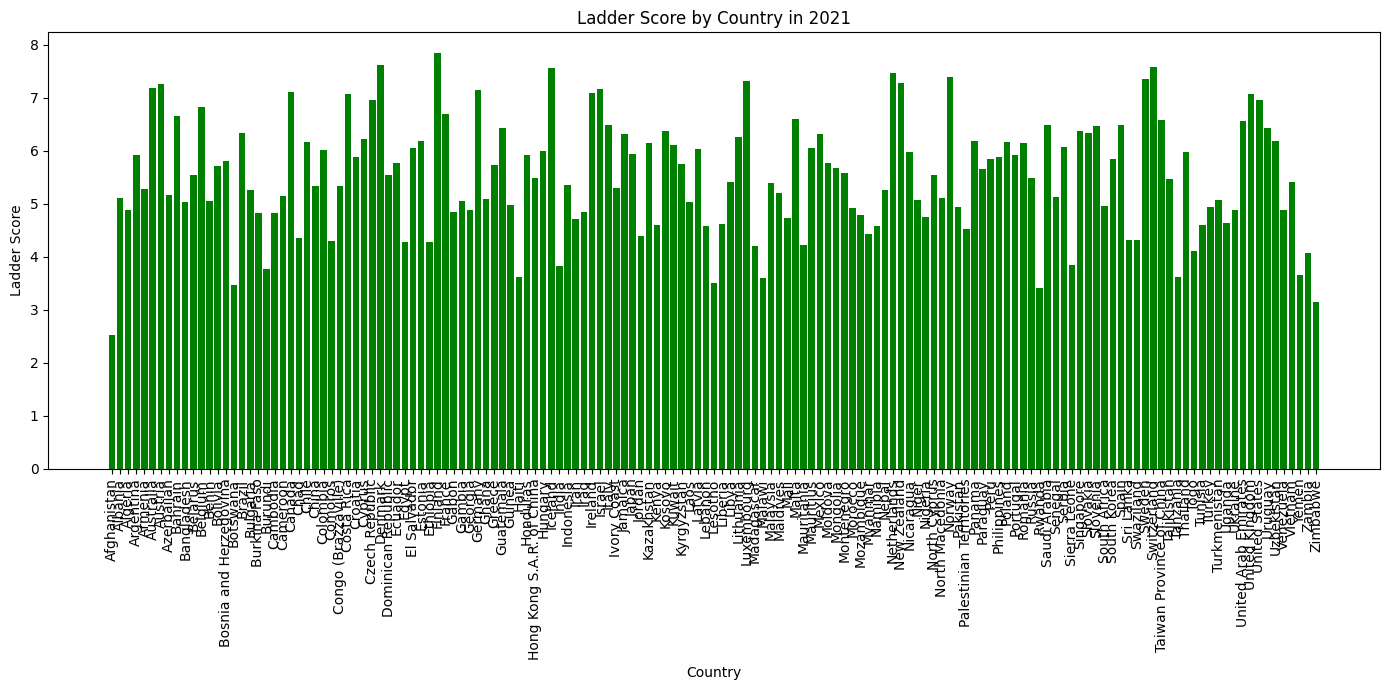

In [152]:
# Gráfica del Ladder score de 2021
plt.figure(figsize=(14, 7))
plt.bar(happy_2021['Country'], happy_2021['Ladder'], color='green')
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Ladder Score by Country in 2021')
plt.xticks(rotation=90)
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar un relleno especificado.
plt.show()

In [116]:
# Pregunta 2: País más feliz de 2021 por continente
top_countries = df_maestro.groupby('Country')['Ladder'].sum().sort_values(ascending=False).head(10)

In [117]:
print(f"El país que más veces ha sido el más feliz es: {top_countries.idxmax()} con un Ladder Score acumulado de {top_countries.max()}")

El país que más veces ha sido el más feliz es: Denmark con un Ladder Score acumulado de 122.826


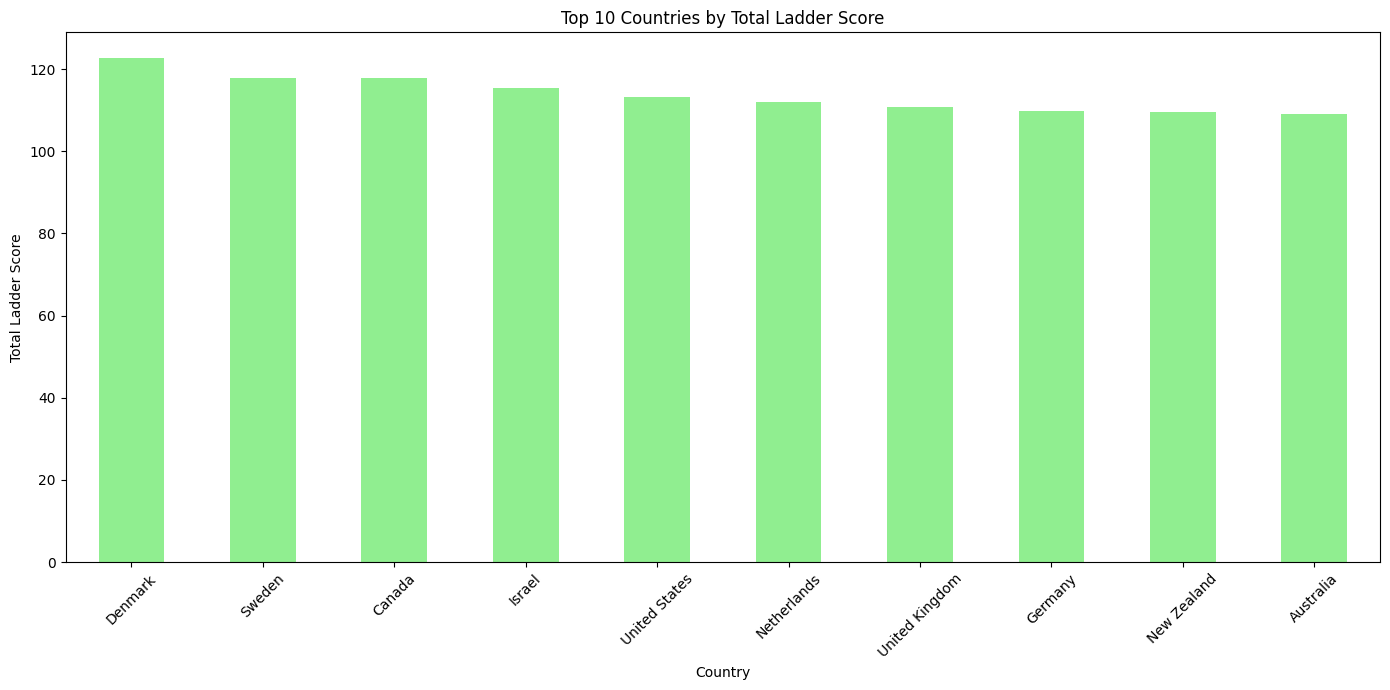

In [118]:
# Pregunta 3: País que más veces ha sido el más feliz
# Gráfica de los 10 países con el Ladder score acumulado más alto
plt.figure(figsize=(14, 7))
top_countries.plot(kind='bar', color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Total Ladder Score')
plt.title('Top 10 Countries by Total Ladder Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
# Pregunta 4: Puesto de Felicidad del país con mayor GDP en 2020
country_with_highest_gdp_2020 = df_maestro[df_maestro['Year'] == 2020].sort_values(by='GDP', ascending=False).iloc[0]
happiness_rank_2020 = df_maestro[(df_maestro['Country'] == country_with_highest_gdp_2020['Country']) & (df_maestro['Year'] == 2021)].iloc[0]

In [157]:
# Ordena el DataFrame por la columna 'GDP' en orden descendente para el año 2020
gdp_2020_sorted = df_maestro[df_maestro['Year'] == 2020].sort_values('GDP', ascending=False)

# Muestra la lista de países ordenada por GDP en 2020
display(gdp_2020_sorted[['Country', 'GDP']])

# Encuentra el país con el mayor GDP en 2020
country_with_highest_gdp_2020 = gdp_2020_sorted.iloc[0]

# Muestra el país con el mayor GDP en 2020
display(country_with_highest_gdp_2020[['Country', 'GDP']])

# Encuentra el rango de felicidad de ese país en 2021
happiness_rank_2021 = df_maestro[(df_maestro['Country'] == country_with_highest_gdp_2020['Country']) & (df_maestro['Year'] == 2021)]

# Muestra el rango de felicidad del país con el mayor GDP en 2021
display(happiness_rank_2021[['Country', 'Year', 'Ladder']])

,Country,GDP
799,Ireland,11.323
1661,Switzerland,11.081
1820,United Arab Emirates,11.053
1309,Norway,11.042
1850,United States,11.001
...,...,...
773,Iran,NaN
918,Kosovo,NaN
1087,Malta,NaN
1681,Taiwan Province of China,NaN


Country    Ireland
GDP         11.323
Name: 799, dtype: object

,Country,Year,Ladder
14,Ireland,2021,7.085


In [121]:
# Pregunta 5 y 6: Variación porcentual del GDP promedio mundial de 2020 a 2021 y si aumentó o disminuyó
average_gdp_2020 = df_maestro[df_maestro['Year'] == 2020]['GDP'].mean()
average_gdp_2021 = df_maestro[df_maestro['Year'] == 2021]['GDP'].mean()
gdp_change = ((average_gdp_2021 - average_gdp_2020) / average_gdp_2020) * 100


In [159]:
# Crear una tabla pivote para el PIB en 2020 y 2021
gdp_pivot = df_maestro[df_maestro['Year'].isin([2020, 2021])].pivot(index='Country', columns='Year', values='GDP')

# Calcular el cambio porcentual para cada país de 2020 a 2021
gdp_pivot['Cambio Porcentual'] = ((gdp_pivot[2021] - gdp_pivot[2020]) / gdp_pivot[2020]) * 100

# Ordenar la tabla por la columna de cambio porcentual
gdp_pivot_sorted = gdp_pivot.sort_values('Cambio Porcentual', ascending=False)

# Mostrar la tabla ordenada
gdp_pivot_sorted


Year,2020,2021,Cambio Porcentual
Country,,,
Zimbabwe,7.829,7.943,1.456125
Argentina,9.850,9.962,1.137056
Iraq,9.167,9.240,0.796335
Spain,10.488,10.571,0.791381
Mexico,9.782,9.859,0.787160
...,...,...,...
Turkmenistan,NaN,9.629,NaN
Uzbekistan,NaN,8.836,NaN
Venezuela,NaN,9.073,NaN


In [123]:
# Pregunta 7: País con mayor expectativa de vida en 2021
country_with_highest_life_expectancy_2021 = df_maestro[df_maestro['Year'] == 2021].sort_values(by='Life expectancy', ascending=False).iloc[0]

In [160]:
# Encuentra el país con la mayor expectativa de vida en 2021 y ordénalo
country_with_highest_life_expectancy_2021 = df_maestro[df_maestro['Year'] == 2021].sort_values(by='Life expectancy', ascending=False).iloc[0]

# Crea un DataFrame para mostrar los resultados de manera más limpia
life_expectancy_df = pd.DataFrame([country_with_highest_life_expectancy_2021])

# Muestra la tabla
life_expectancy_df[['Country', 'Year', 'Life expectancy']]

,Country,Year,Life expectancy
31,Singapore,2021,76.953


In [125]:
# Pregunta 8: Expectativa de vida del país con mayor expectativa en 2019
life_expectancy_in_2019 = df_maestro[(df_maestro['Country'] == country_with_highest_life_expectancy_2021['Country']) & (df_maestro['Year'] == 2019)]['Life expectancy'].iloc[0]

In [161]:
# Encuentra el país con la mayor expectativa de vida en 2021
country_with_highest_life_expectancy_2021 = df_maestro[df_maestro['Year'] == 2021].sort_values(by='Life expectancy', ascending=False).iloc[0]['Country']

# Ahora, encuentra la expectativa de vida para ese país en 2019
life_expectancy_2019 = df_maestro[(df_maestro['Country'] == country_with_highest_life_expectancy_2021) & (df_maestro['Year'] == 2019)]

# Muestra la tabla
display(life_expectancy_2019[['Country', 'Year', 'Life expectancy']])


,Country,Year,Life expectancy
1533,Singapore,2019,77.1


In [127]:
# Imprimir respuestas
print(f"País más feliz en 2021: {most_happy_country_2021['Country']} con un Ladder Score de {most_happy_country_2021['Ladder']}")
print(f"El país que más veces ha sido el más feliz es: {top_countries.idxmax()} con un Ladder Score acumulado de {top_countries.max()}")
print(f"El país con el PIB más alto en 2020 fue {country_with_highest_gdp_2020['Country']} y su Ladder Score en 2021 es {happiness_rank_2020['Ladder']}")
print(f"La variación porcentual del GDP promedio mundial de 2020 a 2021 es de {gdp_change:.2f}%, y {'aumentó' if gdp_change > 0 else 'disminuyó'}.")
print(f"El país con la mayor expectativa de vida en 2021 es {country_with_highest_life_expectancy_2021['Country']} con {country_with_highest_life_expectancy_2021['Life expectancy']} años.")
print(f"La expectativa de vida en {country_with_highest_life_expectancy_2021['Country']} en 2019 fue de {life_expectancy_in_2019:.2f} años.")

País más feliz en 2021: Finland con un Ladder Score de 7.842
El país que más veces ha sido el más feliz es: Denmark con un Ladder Score acumulado de 122.826
El país con el PIB más alto en 2020 fue Ireland y su Ladder Score en 2021 es 7.085
La variación porcentual del GDP promedio mundial de 2020 a 2021 es de -3.27%, y disminuyó.
El país con la mayor expectativa de vida en 2021 es Singapore con 76.953 años.
La expectativa de vida en Singapore en 2019 fue de 77.10 años.
